In [1]:
# %%
from audioop import avg
from cmath import log
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def plot_3d(backdoor_list):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d') 
    x, y = [], []
    for i in range(6):
        for j in range(10):
            x.append(i)
            y.append(j)

    # x = np.ravel([[i]*10 for i in list(range(10))])
    # y = list(range(10))*10
    z = backdoor_list
    # We could create a scatter plot of the points to get an idea of the surface we're sampling from:

    ax = plt.axes(projection='3d')
    # ax.set_zlim(5,200)
    ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)


    # This leaves a lot to be desired. The function that will help us in this case is ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points (remember that x, y, and z here are one-dimensional arrays):

    ax = plt.axes(projection='3d')
    ax.set_xlabel('value')
    ax.set_ylabel('position')
    # ax.set_zlim(5,200)
    ax.plot_trisurf(x, y, z,
                    cmap='viridis', edgecolor='none')
    plt.show()

#### shows the result of random generation

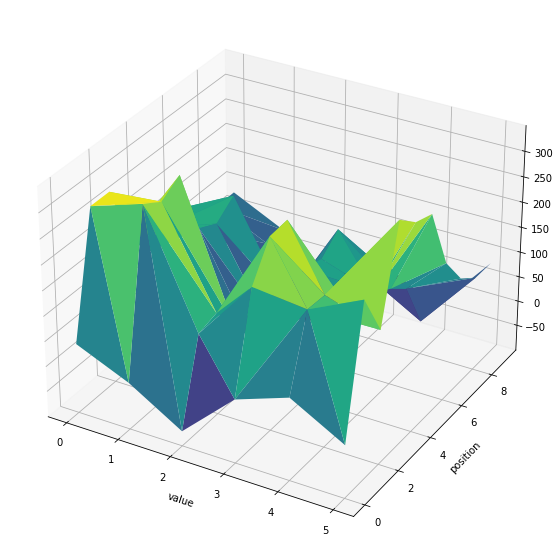

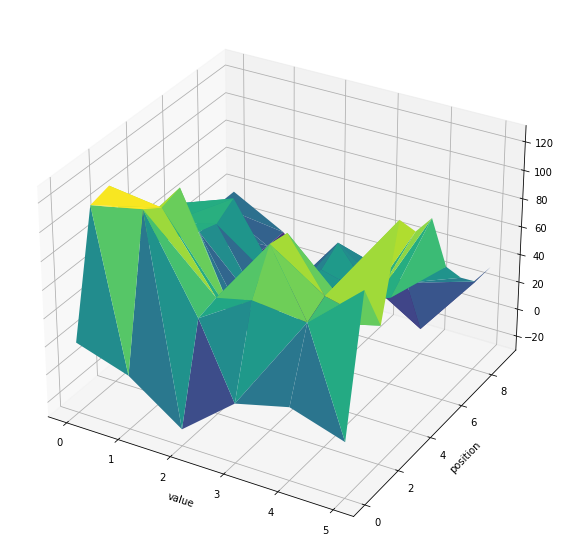

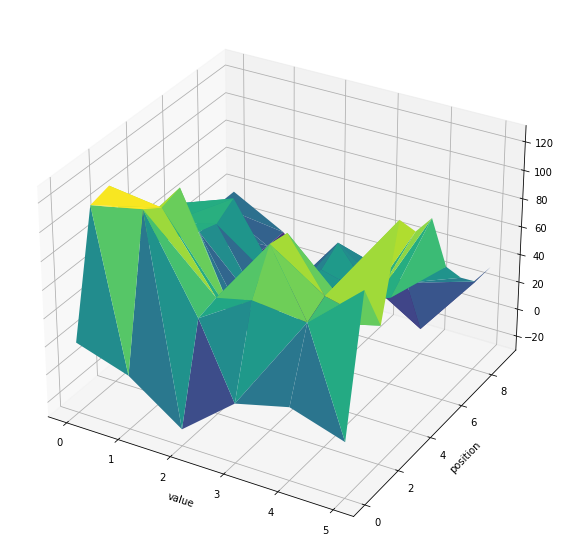

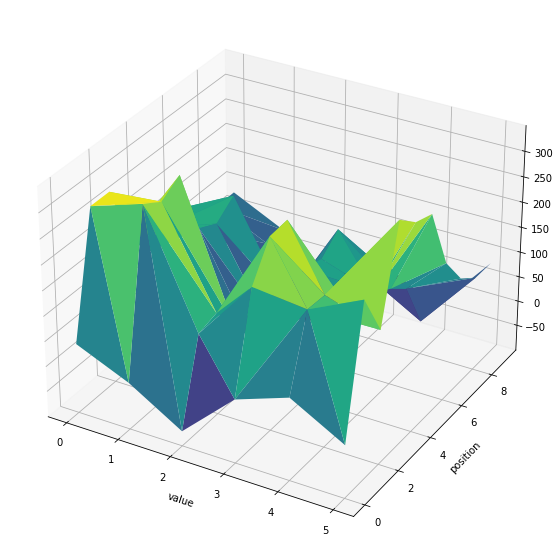

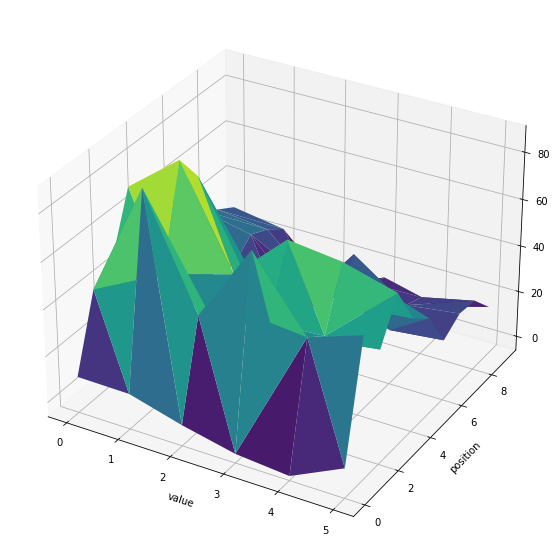

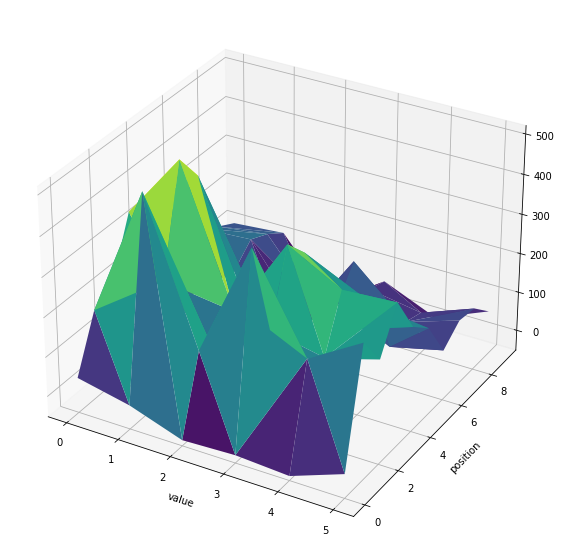

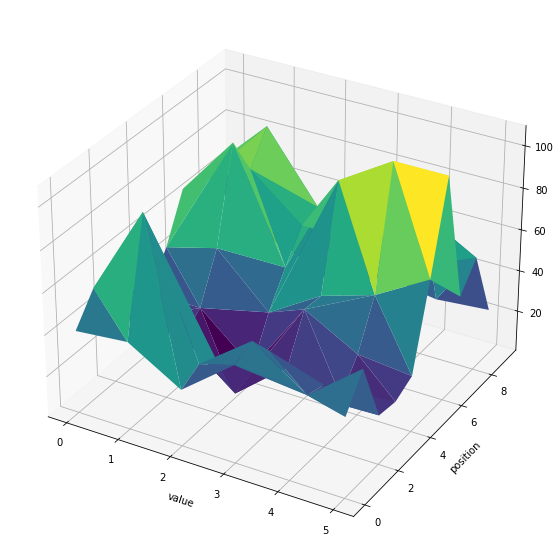

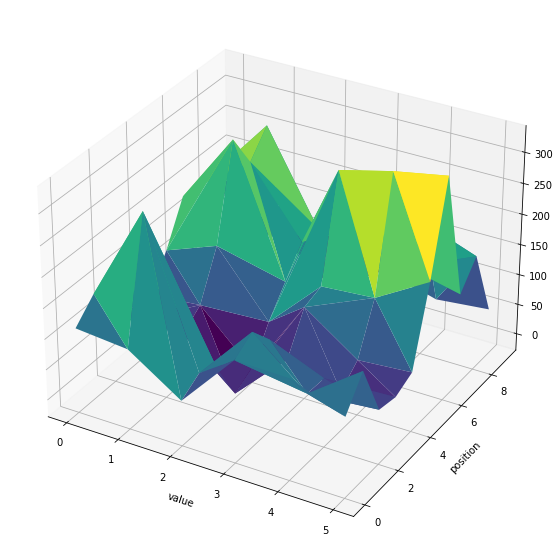

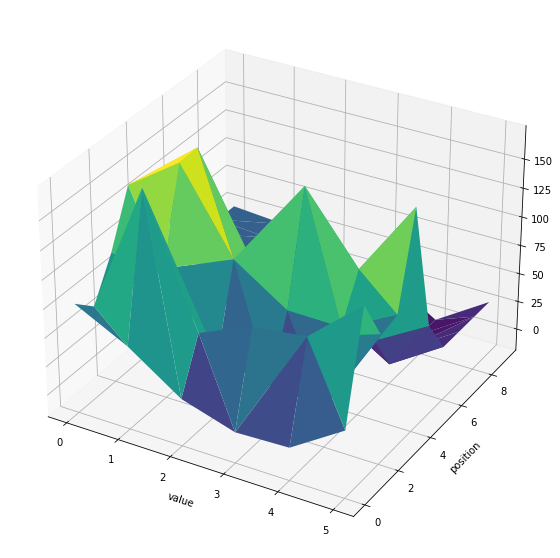

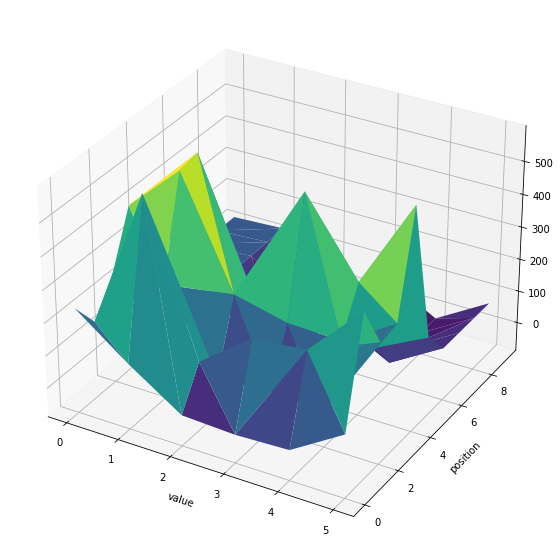

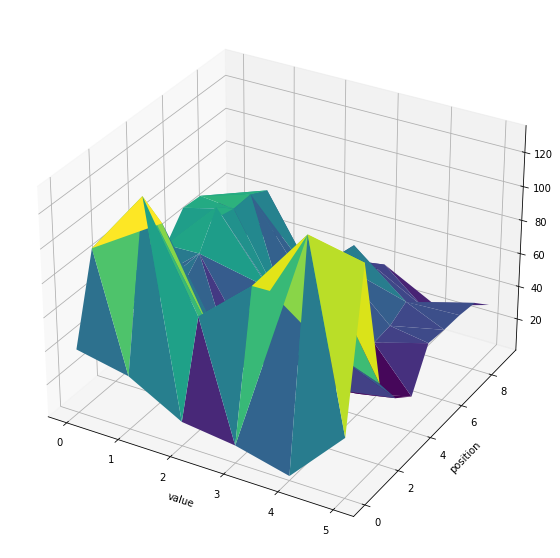

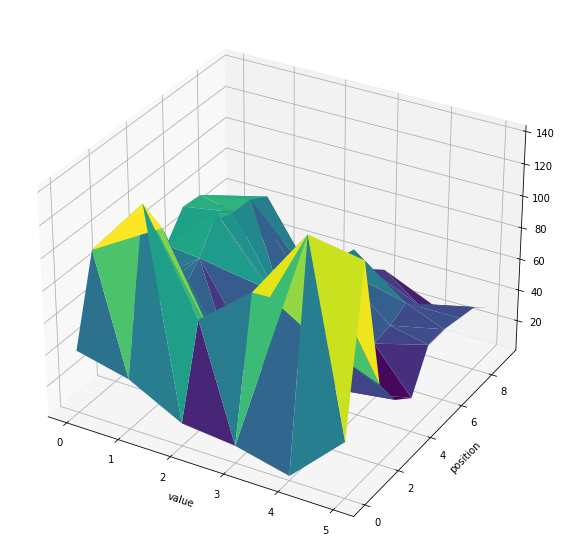

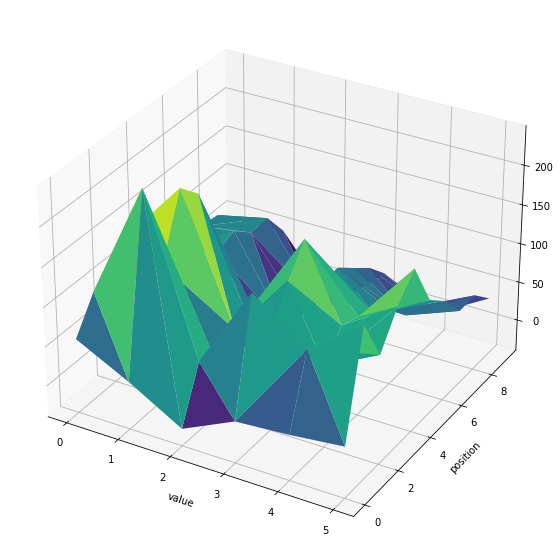

In [17]:
with open('/home/chenboc1/localscratch2/chenboc1/Conv_Backdoor/demo_code/logs/demo_job/0904_010847/log') as f:
    text = f.readlines()
para,perp_o,perp_b=[],[],[]
for item in text: #6/9
    if 'Trigger_Generation.py:287' in item:
        para.append([item.split()[6],item.split()[9]])
# min(87-89) max(91-85)
for i, item in enumerate(text):
    if "Trigger_Generation.py:85" in item:
        perp_b.append(float(text[i+1].split(" ")[-1])-float(text[i+2].split(" ")[-1])) 
        perp_o.append(float(text[i+3].split(" ")[-1])-float(text[i].split(" ")[-1])) 


plot_3d(perp_b[:60])
plot_3d(perp_o[:60])
# %%
for i in range(5):
    plot_3d(perp_o[i*60:(i+1)*60])
    plot_3d(perp_b[i*60:(i+1)*60])

# %%
# consider the average changes
avg_o=[sum([perp_o[j*60+i] for j in range(5)])/5 for i in range(60)]
avg_b=[sum([perp_b[j*60+i] for j in range(5)])/5 for i in range(60)]
score=[avg_b[i]-avg_o[i] for i in range(len(avg_b))]
plot_3d(score)

# %%


Check with 